In [124]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [125]:
# Setting the style of the plots
sns.set(style="darkgrid")

In [126]:
# Loading the data
data = pd.read_csv('Bank Customer Churn Prediction.csv')

In [127]:
# Checking for missing values
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [128]:
# Exploring the data
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [129]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [130]:
data.corr()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


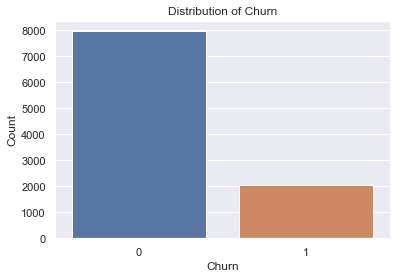

In [131]:
# Checking the distribution of the target variable
sns.countplot(x='churn', data=data)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Distribution of Churn")
plt.show()

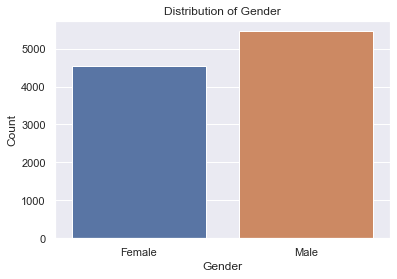

In [132]:
# Checking the distribution of categorical variables
sns.countplot(x='gender', data=data)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender")
plt.show()

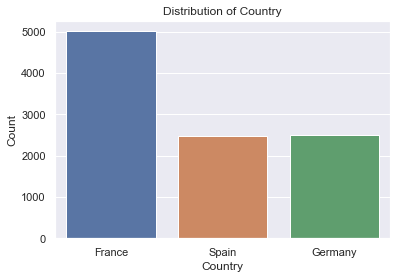

In [133]:
sns.countplot(x='country', data=data)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Distribution of Country")
plt.show()

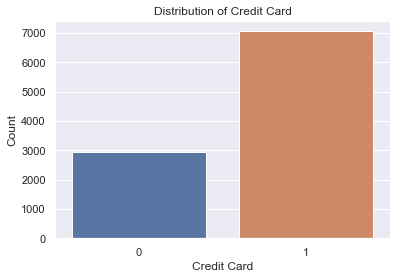

In [134]:
sns.countplot(x='credit_card', data=data)
plt.xlabel("Credit Card")
plt.ylabel("Count")
plt.title("Distribution of Credit Card")
plt.show()

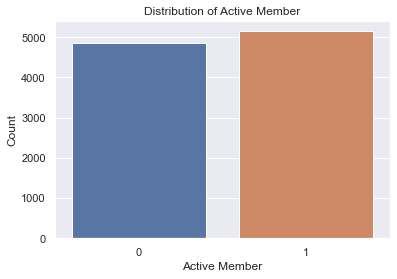

In [135]:
sns.countplot(x='active_member', data=data)
plt.xlabel("Active Member")
plt.ylabel("Count")
plt.title("Distribution of Active Member")
plt.show()

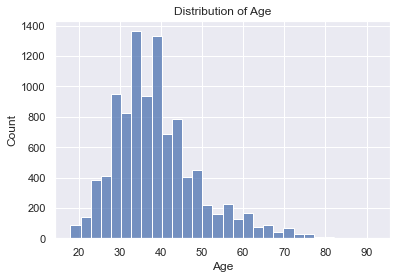

In [136]:
# Check the distribution of numerical variables
sns.histplot(x='age', data=data, bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.show()

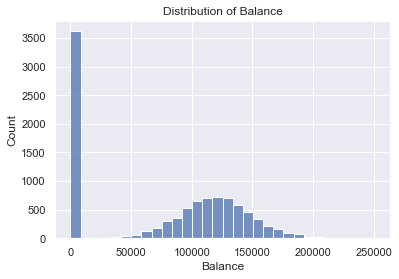

In [137]:
sns.histplot(x='balance', data=data, bins=30)
plt.xlabel("Balance")
plt.ylabel("Count")
plt.title("Distribution of Balance")
plt.show()

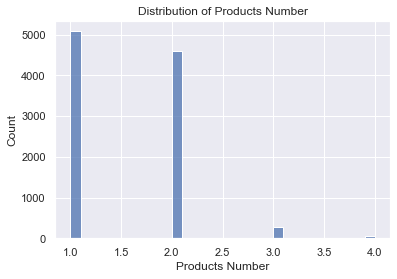

In [138]:
sns.histplot(x='products_number', data=data, bins=30)
plt.xlabel("Products Number")
plt.ylabel("Count")
plt.title("Distribution of Products Number")
plt.show()

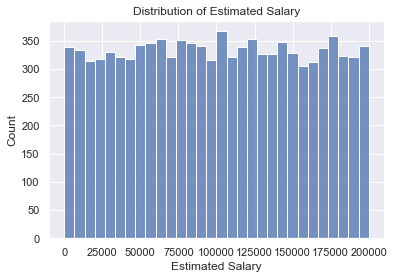

In [139]:
sns.histplot(x='estimated_salary', data=data, bins=30)
plt.xlabel("Estimated Salary")
plt.ylabel("Count")
plt.title("Distribution of Estimated Salary")
plt.show()

In [140]:
# Convert categorical variables into numerical variables using OrdinalEncoder
oe = OrdinalEncoder()
data[['gender', 'country', 'credit_card', 'active_member']] = oe.fit_transform(data[['gender', 'country', 'credit_card', 'active_member']])

In [141]:
# Scale the data
sc = StandardScaler()
X = sc.fit_transform(data.drop(['customer_id', 'churn'], axis=1))
y = data['churn']

In [142]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [144]:
# Evaluate the model
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.815
Precision: 0.5966386554621849
Recall: 0.1806615776081425
F1 score: 0.27734375


In [145]:
# Make predictions on new data
new_data = pd.DataFrame({
    'customer_id': [10001, 10002],
    'credit_score': [600, 700],
    'country': ['France', 'Spain'],
    'gender': ['Female', 'Male'],
    'age': [30, 45],
    'tenure': [2, 5],
    'balance': [5000, 10000],
    'products_number': [1, 2],
    'credit_card': [1, 0],
    'active_member': [1, 0],
    'estimated_salary': [60000, 80000]
})

new_data[['gender', 'country', 'credit_card', 'active_member']] = oe.transform(new_data[['gender', 'country', 'credit_card', 'active_member']])
new_data = sc.transform(new_data.drop(['customer_id'], axis=1))

In [146]:
new_predictions = model.predict(new_data)
print('New predictions:', new_predictions)

New predictions: [0 0]
